<a href="https://colab.research.google.com/github/julichitai/learning_NN/blob/tutorials/pytorch_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/feedforward_neural_network/main.py

In [ ]:
# ================================================================== #
#                         Neural Network                             #
# ================================================================== #

import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 32 * 32 * 3
hidden_size = 500
num_classes = 10
batch_size = 100
learning_rate = 0.001
num_epochs = 10

# MNIST dataset 
train_dataset = torchvision.datasets.CIFAR10('./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10('./data',
                                          train=False,
                                          transform=transforms.ToTensor())
# Data loader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_steps = len(train_loader)
for epoch in range(num_epochs):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, dim=1)
        total += labels.size()[0]
        correct += (labels == predicted).sum()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}]. Step [{i + 1}/{total_steps}].', end=' ')
            print(f'Loss {loss.item()}. Accuracy {round(float(correct / total * 100), 2)}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    total = 0
    correct = 0
    mean_loss = 0
    total_test_size = len(test_loader)
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)

        outputs = model(images)
        loss = criterion(outputs, labels)
        mean_loss += loss

        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.size()[0]
        correct += (labels == predicted).sum()
    
    print(f'Accuracy on {batch_size * total_test_size} test images is {round(float(correct / total * 100), 2)}', end=' ')
    print(f'Loss {mean_loss / total_test_size}')

# Save the model checkpoint
torch.save(model, 'model.pth')

Files already downloaded and verified
Epoch [1/10]. Step [100/500]. Loss 1.7612755298614502. Accuracy 24.83
Epoch [1/10]. Step [200/500]. Loss 1.8539156913757324. Accuracy 28.81
Epoch [1/10]. Step [300/500]. Loss 1.9151349067687988. Accuracy 30.35
Epoch [1/10]. Step [400/500]. Loss 1.5922702550888062. Accuracy 31.85
Epoch [1/10]. Step [500/500]. Loss 1.7429412603378296. Accuracy 32.76
Epoch [2/10]. Step [100/500]. Loss 1.7222720384597778. Accuracy 37.68
Epoch [2/10]. Step [200/500]. Loss 1.7412655353546143. Accuracy 39.19
Epoch [2/10]. Step [300/500]. Loss 1.8095102310180664. Accuracy 39.22
Epoch [2/10]. Step [400/500]. Loss 1.7013442516326904. Accuracy 39.46
Epoch [2/10]. Step [500/500]. Loss 1.5171008110046387. Accuracy 39.87
Epoch [3/10]. Step [100/500]. Loss 1.8305286169052124. Accuracy 42.44
Epoch [3/10]. Step [200/500]. Loss 1.5850419998168945. Accuracy 42.17
Epoch [3/10]. Step [300/500]. Loss 1.5180033445358276. Accuracy 42.13
Epoch [3/10]. Step [400/500]. Loss 1.475077033042907

In [ ]:
model = torch.load('model.pth')

(tensor([0]), 6)

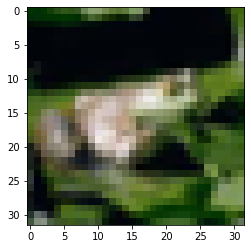

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


idx = np.random.randint(0, len(test_loader))
test_img  = test_dataset.data[idx]
plt.imshow(test_img)
output = model(torch.from_numpy(test_img.reshape(-1, input_size)).type(torch.float32))
_, pred = torch.max(output, dim=1)
pred, test_dataset.targets[idx]

tensor([8]) 8


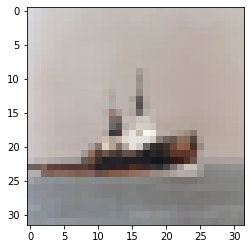

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


for imgs, labels in test_loader:
    idx = np.random.randint(0, test_loader.batch_size)
    img = imgs[idx]
    plt.imshow(np.rollaxis(img.numpy(), 0, 3))
    output = model(img.reshape(-1, input_size).type(torch.float32))
    _, pred = torch.max(output, dim=1)
    print(pred, test_dataset.targets[idx])
    break

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/convolutional_neural_network/main.py

In [ ]:
# ================================================================== #
#                   Convolutional Neural Network                     #
# ================================================================== #

import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
input_size = 32 * 32
num_classes = 10
batch_size = 100
num_epochs = 10
learning_rate = 0.001

# dataset
train_dataset = torchvision.datasets.CIFAR10('./data',
                                            train=True,
                                            transform=transforms.ToTensor(),
                                            download=True)

test_dataset = torchvision.datasets.CIFAR10('./data',
                                           train=False,
                                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc1 = nn.Linear(64 * 5 * 5, output_size)

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        return out


model = ConvNet(input_size, num_classes).to(device)

print(summary(model, (3, 32, 32), batch_size=2))

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, dim=1)
        total = labels.size(0)
        correct = (predicted == labels).sum()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}]. Step [{i + 1}/{total_step}].', end=' ')
            print(f'Loss {loss.item()}. Accuracy {round(float(correct / total * 100), 2)}')

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    total = 0
    correct = 0
    mean_loss = 0
    test_step = len(test_loader)
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        mean_loss += loss

        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print(f'Accuracy on {batch_size * test_step} test images is {round(float(correct / total * 100), 2)}')
    print(f'Mean loss {mean_loss / test_step}')

# Save the model checkpoint
torch.save(model, 'model.pth')

Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [2, 16, 28, 28]           1,216
       BatchNorm2d-2            [2, 16, 28, 28]              32
              ReLU-3            [2, 16, 28, 28]               0
         MaxPool2d-4            [2, 16, 14, 14]               0
            Conv2d-5            [2, 64, 10, 10]          25,664
       BatchNorm2d-6            [2, 64, 10, 10]             128
              ReLU-7            [2, 64, 10, 10]               0
         MaxPool2d-8              [2, 64, 5, 5]               0
            Linear-9                    [2, 10]          16,010
Total params: 43,050
Trainable params: 43,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.94
Params size (MB): 0.16
Estimated Total Size (MB): 1.13
-------

In [ ]:
model = torch.load('model.pth')

[1] 1


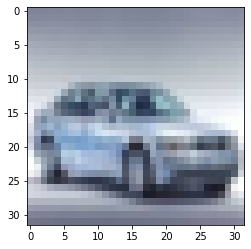

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


idx = np.random.randint(0, len(test_dataset))
img = test_dataset.data[idx]
plt.imshow(img)
img = torch.from_numpy(np.rollaxis(img, 2, 0)).type(torch.float32).to(device)

output = model(img[None])
_, pred = torch.max(output.data, dim=1)

print(pred.cpu().numpy(), test_dataset.targets[idx])

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/deep_residual_network/main.py

In [ ]:
# ================================================================== #
#                       Deep Residual Network                        #
# ================================================================== #


https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ================================================================== #
#                         Transfer Learning                          #
# ================================================================== #

import os
import time
import copy
from tqdm import tqdm
import numpy as np
import torch
from torch import nn, optim
from torch.optim import lr_scheduler
from torchsummary import summary
import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size = 5
num_epoch = 20
learning_rate = 0.001

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])
}

data_dir = '/content/drive/MyDrive/hymenoptera_data'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
data_loaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=batch_size,
                                              shuffle=True)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['val'].classes

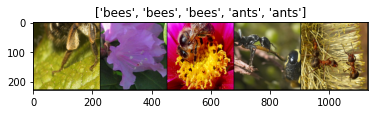

In [ ]:
def imshow(img, title=None):
    """Imshow for Tensor."""
    img = img.numpy().transpose(1, 2, 0)
    plt.imshow(img)
    
    if title:
        plt.title(title)
    plt.show()


# Get a batch of training data
images, labels = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(images)

imshow(out, [class_names[x] for x in labels])

In [ ]:
def train_model(model, num_epoch, criterion, optimizer, scheduler):
    best_model_weights = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in tqdm(range(num_epoch)):
        print(f'Epoch [{epoch + 1}/{num_epoch}].')
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            correct = 0
            mean_loss = 0

            # Iterate over data
            for images, labels in data_loaders[phase]:
                images = images.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)

                    _, predicted = torch.max(outputs, dim=1)
                    correct += (predicted == labels).sum()
                    mean_loss += loss.item() * labels.size(0) 

                    optimizer.zero_grad()
                    
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
            if phase == 'train':
                scheduler.step()
                
            mean_loss /= dataset_sizes[phase]
            mean_acc = correct / dataset_sizes[phase] * 100
            print(f'{phase} loss {mean_loss:.4f}. {phase} acc {mean_acc:.4f}')
        
            # deep copy the model
            if phase == 'val' and mean_acc >= best_acc:
                best_acc = mean_acc
                best_model_weights = copy.deepcopy(model.state_dict())  
        
        print()
    # load best model weights
    model.load_state_dict(best_model_weights)
    return model

In [ ]:

len(list(model.parameters()))

62

In [ ]:
model = models.resnet18(pretrained=True)
model.to(device)
for param in list(model.parameters())[:-10]:
    param.requires_grad = False

# summary(model, (3, 224, 224), batch_size=2)

# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)
model.to(device)
summary(model, (3, 224, 224), batch_size=2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, num_epoch, 
                    criterion=criterion,
                    optimizer=optimizer,
                    scheduler=scheduler)






  0%|          | 0/20 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [2, 64, 112, 112]           9,408
       BatchNorm2d-2          [2, 64, 112, 112]             128
              ReLU-3          [2, 64, 112, 112]               0
         MaxPool2d-4            [2, 64, 56, 56]               0
            Conv2d-5            [2, 64, 56, 56]          36,864
       BatchNorm2d-6            [2, 64, 56, 56]             128
              ReLU-7            [2, 64, 56, 56]               0
            Conv2d-8            [2, 64, 56, 56]          36,864
       BatchNorm2d-9            [2, 64, 56, 56]             128
             ReLU-10            [2, 64, 56, 56]               0
       BasicBlock-11            [2, 64, 56, 56]               0
           Conv2d-12            [2, 64, 56, 56]          36,864
      BatchNorm2d-13            [2, 64, 56, 56]             128
             ReLU-14            [2, 64,






  5%|▌         | 1/20 [00:03<01:14,  3.93s/it]

val loss 0.4984. val acc 77.1242

Epoch [2/20].
train loss 0.5360. train acc 75.8197







 10%|█         | 2/20 [00:07<01:10,  3.94s/it]

val loss 0.3769. val acc 88.2353

Epoch [3/20].
train loss 0.4816. train acc 79.9180







 15%|█▌        | 3/20 [00:11<01:06,  3.93s/it]

val loss 0.3187. val acc 88.2353

Epoch [4/20].
train loss 0.4040. train acc 81.5574







 20%|██        | 4/20 [00:15<01:02,  3.93s/it]

val loss 0.2852. val acc 90.8497

Epoch [5/20].
train loss 0.4191. train acc 80.3279







 25%|██▌       | 5/20 [00:19<00:58,  3.93s/it]

val loss 0.2631. val acc 91.5033

Epoch [6/20].
train loss 0.3555. train acc 85.6557







 30%|███       | 6/20 [00:23<00:55,  3.93s/it]

val loss 0.2353. val acc 92.8105

Epoch [7/20].
train loss 0.4093. train acc 79.5082







 35%|███▌      | 7/20 [00:27<00:51,  3.94s/it]

val loss 0.2409. val acc 91.5033

Epoch [8/20].
train loss 0.3815. train acc 81.9672







 40%|████      | 8/20 [00:31<00:47,  3.94s/it]

val loss 0.2317. val acc 93.4641

Epoch [9/20].
train loss 0.3545. train acc 85.6557







 45%|████▌     | 9/20 [00:35<00:43,  3.94s/it]

val loss 0.2455. val acc 90.8497

Epoch [10/20].
train loss 0.3331. train acc 86.4754







 50%|█████     | 10/20 [00:39<00:39,  3.93s/it]

val loss 0.2261. val acc 93.4641

Epoch [11/20].
train loss 0.3562. train acc 86.0656







 55%|█████▌    | 11/20 [00:43<00:35,  3.94s/it]

val loss 0.2345. val acc 92.8105

Epoch [12/20].
train loss 0.3968. train acc 81.5574







 60%|██████    | 12/20 [00:47<00:31,  3.93s/it]

val loss 0.2532. val acc 90.8497

Epoch [13/20].
train loss 0.3987. train acc 81.1475







 65%|██████▌   | 13/20 [00:51<00:27,  3.93s/it]

val loss 0.2414. val acc 91.5033

Epoch [14/20].
train loss 0.3224. train acc 88.1148







 70%|███████   | 14/20 [00:55<00:23,  3.92s/it]

val loss 0.2378. val acc 92.1569

Epoch [15/20].
train loss 0.3024. train acc 88.5246







 75%|███████▌  | 15/20 [00:58<00:19,  3.92s/it]

val loss 0.2249. val acc 93.4641

Epoch [16/20].
train loss 0.2866. train acc 90.1639







 80%|████████  | 16/20 [01:03<00:15,  3.98s/it]

val loss 0.2279. val acc 92.1569

Epoch [17/20].
train loss 0.3826. train acc 82.7869







 85%|████████▌ | 17/20 [01:07<00:12,  4.01s/it]

val loss 0.2276. val acc 92.1569

Epoch [18/20].
train loss 0.3589. train acc 85.6557







 90%|█████████ | 18/20 [01:11<00:08,  4.01s/it]

val loss 0.2290. val acc 92.8105

Epoch [19/20].
train loss 0.3421. train acc 84.8361







 95%|█████████▌| 19/20 [01:15<00:03,  4.00s/it]

val loss 0.2232. val acc 93.4641

Epoch [20/20].
train loss 0.3411. train acc 87.7049







100%|██████████| 20/20 [01:19<00:00,  3.95s/it]

val loss 0.2320. val acc 92.8105



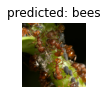

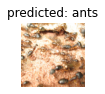

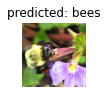

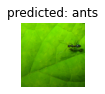

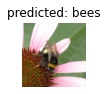

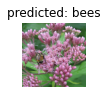

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(data_loaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


visualize_model(model)